## Equally-Weighted Portfolio Backtest.

In [19]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [21]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 20

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-08-30 00:00:00
Num Train Iterations: 284
Num OOS Daily Points: 5954


In [22]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 284/284 [00:02<00:00, 110.06it/s]


StrategyStatistics:
* final_nav = 6.158263
* geom_avg_total_r = 0.099940
* geom_avg_xs_r = 0.092093
* std_xs_r = 0.212089
* min_xs_r = -0.109602
* max_xs_r = 0.107242
* skew = -0.025528
* kurtosis = 9.783505
* max_dd = -0.530423
* sharpe = 0.434220
* alpha_buy_hold = 0.021391
* tracking_error_buy_hold = 0.051262
* ir_buy_hold = 0.417277
* factor_loadings = {'low_risk': 0.17858648296891744, 'momentum': -0.06687021933581422, 'quality': -0.028143718237826413, 'size': -0.018226219628715477, 'value': -0.17497164769070442, 'spx': 1.0092493874216517}
* alpha_benchmark = 0.026337
* alpha_benchmark_pvalue = 0.021496
* tracking_error_benchmark = 0.048011
* ir_benchmark = 0.548564
* ttest_pval = 0.392054
* levene_pval = 0.636698
* timing_ability_coef = 0.025637
* timing_ability_pval = 0.001494

In [23]:
result.std_xs_r, result.sharpe

(0.21208912314973258, 0.4342201464466039)

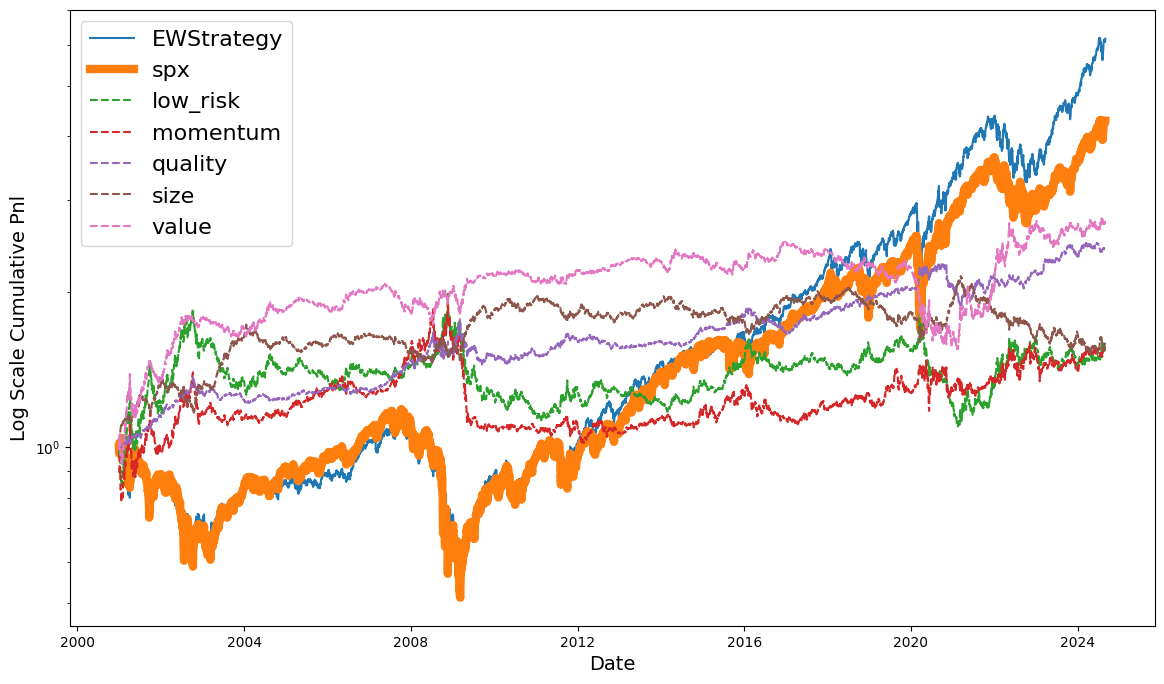

In [24]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

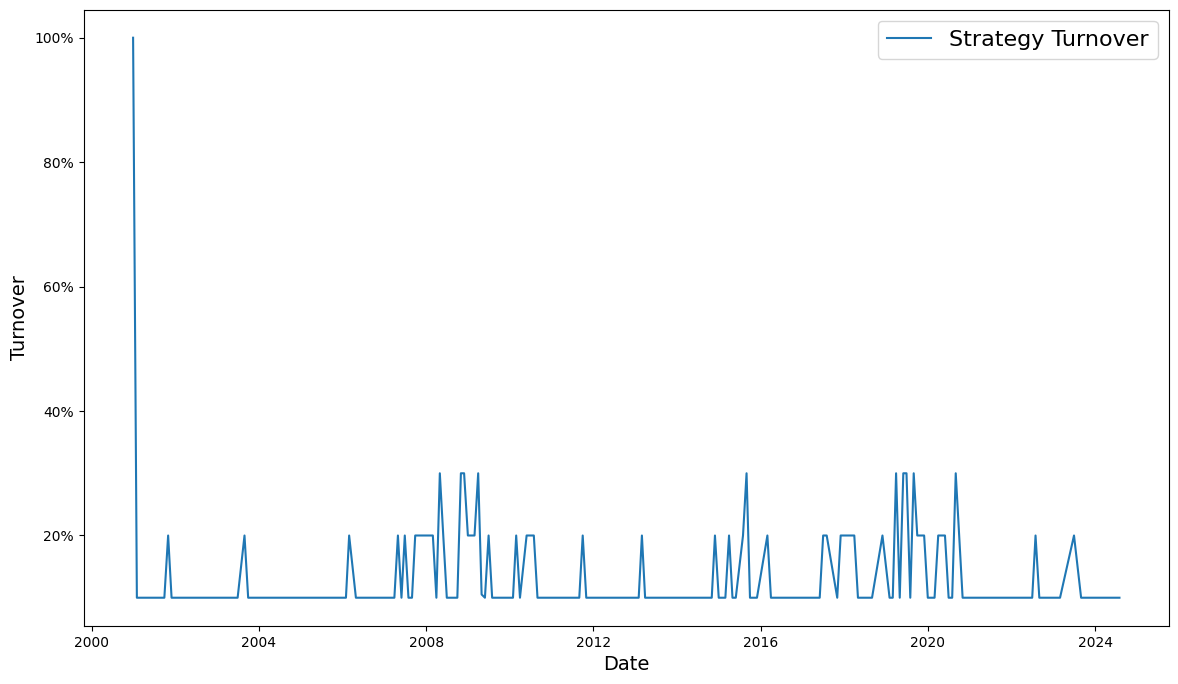

In [25]:
runner.plot_turnover()

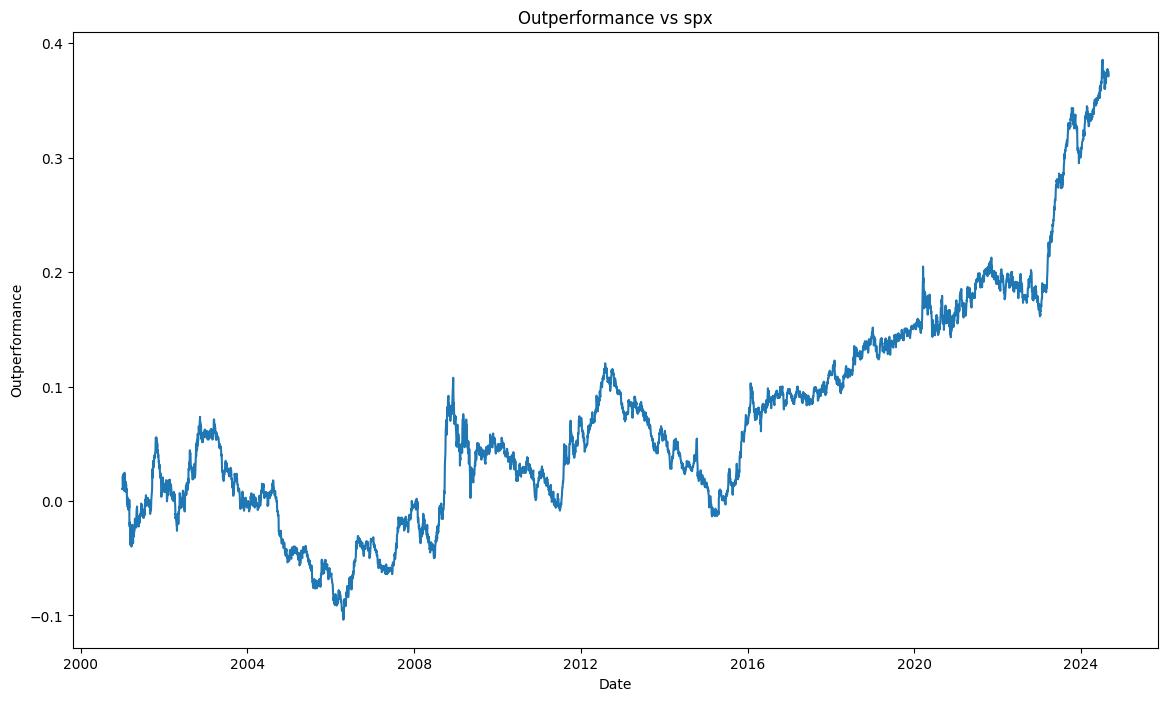

In [26]:
runner.plot_outperformance(mkt_only=True)

In [27]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")